# 🧠 Step 1: Data Understanding

In this section, we will explore the structure of our dataset to understand:
- How many rows and columns it contains
- The types of variables available
- Initial observations on missing or inconsistent data


In [2]:
# Import libraries
import pandas as pd
import numpy as np

import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('../data/raw/car_insurance_claim.csv')

# Shape and preview
print(f"✅ Data Loaded Successfully! Shape: {df.shape}")
df.head(5)

✅ Data Loaded Successfully! Shape: (10302, 27)


,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,...,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,...,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,...,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban


## 🔍 Step 1.1 — Dataset Overview

Before diving deeper, let's explore the structure and basic properties of our dataset.  
We'll check:
1. The total number of rows and columns  
2. The column names and their data types  
3. Missing or inconsistent values  
4. Initial numeric summaries


In [4]:
# Display dataset structure and column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  object 
 3   AGE         10295 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         9754 non-null   float64
 6   INCOME      9732 non-null   object 
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    9727 non-null   object 
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  9637 non-null   object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  object 
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  object 
 19  OLDCLAIM    10302 non-nul

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10302.0,4.956631e+08,2.864675e+08,63175.0,244286856.0,497004293.0,739455069.0,999926368.0
KIDSDRIV,10302.0,1.692875e-01,5.065116e-01,0.0,0.0,0.0,0.0,4.0
AGE,10295.0,4.483740e+01,8.606445e+00,16.0,39.0,45.0,51.0,81.0
HOMEKIDS,10302.0,7.204426e-01,1.116323e+00,0.0,0.0,0.0,1.0,5.0
YOJ,9754.0,1.047406e+01,4.108943e+00,0.0,9.0,11.0,13.0,23.0
TRAVTIME,10302.0,3.341642e+01,1.586969e+01,5.0,22.0,33.0,44.0,142.0
TIF,10302.0,5.329159e+00,4.110795e+00,1.0,1.0,4.0,7.0,25.0
CLM_FREQ,10302.0,8.007183e-01,1.154079e+00,0.0,0.0,0.0,2.0,5.0
MVR_PTS,10302.0,1.710153e+00,2.159015e+00,0.0,0.0,1.0,3.0,13.0
CAR_AGE,9663.0,8.298148e+00,5.714450e+00,-3.0,1.0,8.0,12.0,28.0


In [6]:
# Check for missing values in each column
df.isnull().sum().sort_values(ascending=False)

OCCUPATION    665
CAR_AGE       639
HOME_VAL      575
INCOME        570
YOJ           548
AGE             7
ID              0
TIF             0
CLAIM_FLAG      0
CLM_AMT         0
MVR_PTS         0
REVOKED         0
CLM_FREQ        0
OLDCLAIM        0
RED_CAR         0
CAR_TYPE        0
TRAVTIME        0
BLUEBOOK        0
CAR_USE         0
KIDSDRIV        0
EDUCATION       0
GENDER          0
MSTATUS         0
PARENT1         0
HOMEKIDS        0
BIRTH           0
URBANICITY      0
dtype: int64

## 🚘 Exploring `CAR_AGE`

The `CAR_AGE` column represents the age of the vehicle in years.  
Understanding this helps us see whether policyholders mostly own new or old cars,  
and whether we might have unrealistic values (like negative ages or extreme outliers).


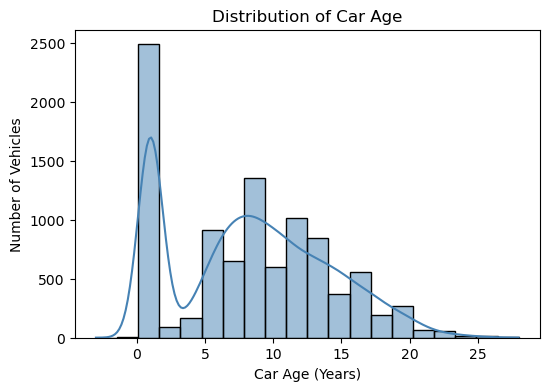

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.histplot(df['CAR_AGE'], bins=20, kde=True, color='steelblue')
plt.title('Distribution of Car Age')
plt.xlabel('Car Age (Years)')
plt.ylabel('Number of Vehicles')
plt.show()


### 🧠 Insights on Car Age
- The distribution of `CAR_AGE` is **right-skewed** and slightly **bimodal**.
- Two main groups: very new cars (0–2 years) and older cars (8–12 years).
- Very few vehicles older than 20 years — potential outliers but realistic.
- No negative ages detected.


## 📊 Step 2 — Data Overview and Missing Value Analysis

Before cleaning the data, let's take a deeper look at its structure and completeness.  
This step helps us identify which columns contain missing or inconsistent data and what types of variables we are dealing with.

### 🎯 Objectives
1. Quantify missing values across all columns  
2. Distinguish between **numeric** and **categorical** variables  
3. Build an initial plan for handling missing data

---

### 🧩 What We’ll Do
- Generate a **missing value summary** using `df.isnull().sum()`
- Visualize missingness with a **bar chart**
- Identify **variable types** using `df.select_dtypes()`
- Prepare a column-wise cleaning strategy for the next step


In [11]:
df.isnull().sum().sort_values(ascending=False)


OCCUPATION    665
CAR_AGE       639
HOME_VAL      575
INCOME        570
YOJ           548
AGE             7
ID              0
TIF             0
CLAIM_FLAG      0
CLM_AMT         0
MVR_PTS         0
REVOKED         0
CLM_FREQ        0
OLDCLAIM        0
RED_CAR         0
CAR_TYPE        0
TRAVTIME        0
BLUEBOOK        0
CAR_USE         0
KIDSDRIV        0
EDUCATION       0
GENDER          0
MSTATUS         0
PARENT1         0
HOMEKIDS        0
BIRTH           0
URBANICITY      0
dtype: int64

In [12]:
# Identify numeric and categorical columns

num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numeric columns ({len(num_cols)}):")
print(num_cols)
print(f"\nCategorical columns ({len(cat_cols)}):")
print(cat_cols)


Numeric columns (11):
['ID', 'KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'TRAVTIME', 'TIF', 'CLM_FREQ', 'MVR_PTS', 'CAR_AGE', 'CLAIM_FLAG']

Categorical columns (16):
['BIRTH', 'INCOME', 'PARENT1', 'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'CAR_USE', 'BLUEBOOK', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM', 'REVOKED', 'CLM_AMT', 'URBANICITY']


### 🧠 Observation:
- The dataset contains **11 numeric columns** and **16 categorical columns**.
- Numeric columns will be cleaned for outliers and missing values.
- Categorical columns will be standardized (e.g., `'Yes' → 1'`, `'No' → 0'`, `'Unknown'` for missing).
- This classification will guide our cleaning strategy in the next step.


# 🧹 Step 3 — Data Cleaning

Data cleaning is one of the most important stages of EDA.  
A clean dataset helps ensure that every pattern and insight we find later is accurate and meaningful.  

### 🎯 Objectives
1. **Fix formatting issues** — e.g., remove `$` and `,` from currency fields  
2. **Handle missing values** — fill, impute, or flag them properly  
3. **Standardize categorical variables** — unify inconsistent text (e.g., `Yes`/`No`, `Male`/`M`)  
4. **Correct invalid values** — such as negative ages or impossible numbers  
5. **Confirm correct data types** — convert text numbers into numeric formats  

---

### 🧩 Cleaning Roadmap
| Sub-Step | Task | Example Columns | Goal |
|-----------|------|-----------------|------|
| **3.1** | Clean currency-formatted columns | `INCOME`, `HOME_VAL`, `BLUEBOOK`, `OLDCLAIM`, `CLM_AMT` | Convert to float |
| **3.2** | Handle missing values | `YOJ`, `OCCUPATION`, `CAR_AGE`, etc. | Fill or impute |
| **3.3** | Standardize binary columns | `REVOKED`, `RED_CAR`, `PARENT1` | Map `'Yes'→1'`, `'No'→0'` |
| **3.4** | Standardize categorical text | `GENDER`, `MSTATUS`, `CAR_TYPE`, `EDUCATION` | Normalize case & spelling |
| **3.5** | Validate numeric ranges | `AGE`, `CAR_AGE`, `INCOME` | Fix negatives / unrealistic values |
| **3.6** | Final verification | — | Check datatypes & missing counts |

---

After this step, we’ll have a fully cleaned and type-consistent dataset ready for visual analysis.


In [15]:
# Define the list of currency columns
currency_cols = ['INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM', 'CLM_AMT']

# Function to clean currency strings
def clean_currency(value):
    if isinstance(value, str):
        value = value.replace('$', '').replace(',', '').strip()
        if value == '' or value.upper() == 'NA':
            return np.nan
        else:
            try:
                return float(value)
            except:
                return np.nan
    return value

# Apply cleaning function to each currency column
for col in currency_cols:
    df[col] = df[col].apply(clean_currency)

# Convert to float (in case any remain as object)
df[currency_cols] = df[currency_cols].astype(float)

# Verify the cleaning
df[currency_cols].head()


,INCOME,HOME_VAL,BLUEBOOK,OLDCLAIM,CLM_AMT
0,67349.0,0.0,14230.0,4461.0,0.0
1,91449.0,257252.0,14940.0,0.0,0.0
2,52881.0,0.0,21970.0,0.0,0.0
3,16039.0,124191.0,4010.0,38690.0,0.0
4,NaN,306251.0,15440.0,0.0,0.0


### ✅ Step 3.1 Completed — Currency Columns Cleaned

The following columns have been successfully cleaned and converted from string format (with `$` and `,`) to numeric floats:
- `INCOME`
- `HOME_VAL`
- `BLUEBOOK`
- `OLDCLAIM`
- `CLM_AMT`

#### 🧠 Observations:
| Column | Example Value | Meaning |
|---------|----------------|----------|
| **INCOME** | 67,349 | Annual income of the policyholder |
| **HOME_VAL** | 257,252 | Estimated value of the home |
| **BLUEBOOK** | 14,940 | Current market value of the car |
| **OLDCLAIM** | 38,690 | Total of previous claim amounts |
| **CLM_AMT** | 0.0 | Current claim amount (0 = no claim) |

- Missing or invalid values were replaced with `NaN`.  
- All columns now have proper numeric types (`float64`).  
- This allows us to calculate averages, medians, and correlations correctly later.

Next, we’ll handle **missing values** and ensure no invalid numeric entries (like negative car ages) remain.


## 🧹 Step 3.1 — Handling Missing Values

Goal: Reduce or remove missing values with sensible rules so our dataset is usable for analysis.

**Principles we follow**
- For numeric columns: use **median** (robust to outliers).
- For categorical columns: use the **mode** (most common value) or `'Unknown'` when mode is not appropriate.
- For columns where a group-based approach makes sense (e.g., `CAR_AGE` by `CAR_TYPE`), use group median to preserve segment differences.
- Always compare missing counts before and after to confirm changes.

We'll:
1. Inspect columns with missing values.
2. Impute numeric columns with medians.
3. Impute categorical columns with mode or `'Unknown'`.
4. Use group-wise median for `CAR_AGE` by `CAR_TYPE`.
5. Report the result.


In [18]:

# Show missing counts before
print("Missing values BEFORE:")
missing_before = df.isnull().sum().sort_values(ascending=False)
print(missing_before[missing_before > 0])
print("\n---\n")

# Columns known to have missing values (from earlier exploration)
# We'll choose sensible defaults per column type/purpose.

# 1) Group-wise fill for CAR_AGE using median per CAR_TYPE (preserves segment differences)
if 'CAR_AGE' in df.columns and 'CAR_TYPE' in df.columns:
    df['CAR_AGE'] = df.groupby('CAR_TYPE')['CAR_AGE'].transform(lambda x: x.fillna(x.median()))

# 2) Numeric columns to fill with global median (if still missing)
numeric_impute_cols = []
for col in df.select_dtypes(include=['int64','float64']).columns:
    if df[col].isnull().sum() > 0:
        numeric_impute_cols.append(col)

# Remove CAR_AGE if already handled above
numeric_impute_cols = [c for c in numeric_impute_cols if c != 'CAR_AGE']

for col in numeric_impute_cols:
    med = df[col].median()
    df[col].fillna(med, inplace=True)

# 3) Currency / string-numeric columns (already cleaned to float in 3.1)
# If any remain missing, fill with median
for col in ['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT']:
    if col in df.columns and df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# 4) Categorical columns: fill with mode or 'Unknown' for occupations
cat_missing = [c for c in df.select_dtypes(include=['object']).columns if df[c].isnull().sum() > 0]
for col in cat_missing:
    if col.lower() == 'occupation':
        df[col].fillna('Unknown', inplace=True)
    else:
        mode = df[col].mode()
        if len(mode) > 0:
            df[col].fillna(mode[0], inplace=True)
        else:
            df[col].fillna('Unknown', inplace=True)

# Quick check: If YOJ (years on job) exists and is still missing, fill with median
if 'YOJ' in df.columns and df['YOJ'].isnull().sum() > 0:
    df['YOJ'].fillna(df['YOJ'].median(), inplace=True)

# Final missing summary
print("Missing values AFTER:")
missing_after = df.isnull().sum().sort_values(ascending=False)
print(missing_after[missing_after > 0] if (missing_after > 0).any() else "No missing values remain in the dataset.")


Missing values BEFORE:
OCCUPATION    665
CAR_AGE       639
HOME_VAL      575
INCOME        570
YOJ           548
AGE             7
dtype: int64

---

Missing values AFTER:
No missing values remain in the dataset.


## ⚙️ Step 3.3 — Standardizing Binary Columns

Many categorical columns contain binary values like **'Yes' / 'No'** or **'Y' / 'N'**.  
These need to be converted into numeric form (`1` for Yes, `0` for No)  
so that:
- They can be used easily in plots, correlation analysis, and machine learning models.
- The dataset maintains consistent formatting.

**Columns affected:**
- `REVOKED` → 1 if License Revoked, else 0  
- `RED_CAR` → 1 if Car is Red, else 0  
- `PARENT1` → 1 if Single Parent, else 0


In [20]:
# Step 3.3 — Convert binary Yes/No columns to 1/0

binary_cols = ['REVOKED', 'RED_CAR', 'PARENT1']

# Standardize case (in case some values are 'yes' or 'YES')
for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].str.strip().str.lower()  # remove spaces & make lowercase
        df[col] = df[col].map({'yes': 1, 'no': 0})

# Verify the transformation
df[binary_cols].head()


,REVOKED,RED_CAR,PARENT1
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,0
4,0,1,0


### 🧠 What Happened:
- Converted all `'Yes'` and `'No'` entries into numeric form:
  - `'Yes'` → `1`
  - `'No'` → `0`
- Applied `str.lower()` and `str.strip()` to handle messy text (like `' Yes '` or `'NO'`).
- This ensures these columns are now clean, consistent, and machine-readable.

✅ Example:
| Column | Before | After |
|:--------|:-------|:-------|
| REVOKED | 'Yes' | 1 |
| RED_CAR | 'No' | 0 |
| PARENT1 | 'Yes' | 1 |


## 🧾 Step 3.4 — Standardizing Categorical Columns

Categorical columns often have small inconsistencies such as:
- Mixed letter cases (e.g., `'male'`, `'Male'`, `'MALE'`)
- Extra spaces (`'Married '` vs `'Married'`)
- Slightly different spellings or missing labels (`'PhD'`, `'PHD'`, `'phd'`)

We’ll:
1. Standardize text case (make all lowercase)
2. Strip leading/trailing spaces
3. Replace inconsistent or unclear categories with standard labels
4. Ensure all categorical columns are tidy for visualization and grouping.


In [23]:
# Step 3.4 — Standardizing Categorical Columns

# Identify key categorical columns to clean
cat_cols_to_clean = ['GENDER', 'MSTATUS', 'EDUCATION', 'CAR_TYPE', 'URBANICITY', 'OCCUPATION']

# 1️⃣ Standardize text case and strip spaces
for col in cat_cols_to_clean:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.lower()

# 2️⃣ Fix common category inconsistencies
# Gender: male/female
if 'GENDER' in df.columns:
    df['GENDER'] = df['GENDER'].replace({'m': 'male', 'f': 'female'})

# Marital Status: single/married
if 'MSTATUS' in df.columns:
    df['MSTATUS'] = df['MSTATUS'].replace({'z_married': 'married', 'z_single': 'single'})

# Education: normalize variations
if 'EDUCATION' in df.columns:
    df['EDUCATION'] = df['EDUCATION'].replace({
        'phd': 'phd',
        'ph.d': 'phd',
        'bachelor': 'bachelors',
        'masters': 'masters',
        'college': 'college',
        'high school': 'high school',
    })

# URBANICITY: map to simpler labels (if applicable)
if 'URBANICITY' in df.columns:
    df['URBANICITY'] = df['URBANICITY'].replace({
        'urban': 'urban',
        'rural': 'rural',
        'highly urban/urban': 'urban',
        'z_urban': 'urban',
        'z_rural': 'rural'
    })

# Print sample to verify
df[cat_cols_to_clean].head()

# assuming df is your DataFrame
df = df.apply(lambda col: col.str.replace('^z_', '', regex=True) if col.dtype == 'object' else col)


### 🧠 What We Did:
- Standardized all text-based categorical columns to lowercase and trimmed extra spaces.
- Normalized values across columns to ensure consistency:
  - `'Male'`, `'M'`, `'male'` → `male`
  - `'Married'`, `'Z_Married'` → `married`
  - `'PhD'`, `'ph.d'` → `phd`
  - `'Urban'`, `'Z_Urban'`, `'Highly Urban'` → `urban`
- These fixes make visualizations cleaner and prevent duplicated categories (e.g., `'Male'` vs `'male'`).
- This ensures category-level grouping and bar plots will show correct counts.

✅ After this step:
All categorical values follow a single, consistent naming format across the dataset.


In [25]:
for col in cat_cols_to_clean:
    print(f"\n{col}:")
    print(df[col].unique())



GENDER:
['male' 'f']

MSTATUS:
['no' 'yes']

EDUCATION:
['phd' 'high school' 'bachelors' '<high school' 'masters']

CAR_TYPE:
['minivan' 'van' 'suv' 'sports car' 'panel truck' 'pickup']

URBANICITY:
['highly urban/ urban' 'highly rural/ rural']

OCCUPATION:
['professional' 'blue collar' 'manager' 'clerical' 'doctor' 'lawyer'
 'unknown' 'home maker' 'student']


## 📈 Step 3.5 — Validating Numeric Ranges & Handling Outliers

Even after cleaning, some numeric columns may still contain:
- Negative or impossible values (e.g., `AGE < 0`)
- Extremely large values that are valid but distort plots and statistics (outliers)

We’ll:
1. Check numeric columns for invalid ranges.
2. Detect outliers using the **IQR method** (Interquartile Range).
3. Decide whether to **cap** or **retain** them based on business context.

Outlier treatment improves the interpretability of visualizations and prevents skewed analysis.


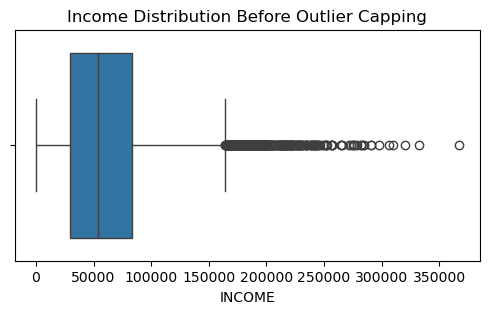

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
sns.boxplot(x=df['INCOME'])
plt.title("Income Distribution Before Outlier Capping")
plt.show()


In [28]:
# Step 3.5 — Validate Numeric Ranges and Outliers

import numpy as np

# Select numeric columns for validation
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# 1️⃣ Detect invalid values
invalid_age = df[df['AGE'] < 0].shape[0] if 'AGE' in df.columns else 0
invalid_car_age = df[df['CAR_AGE'] < 0].shape[0] if 'CAR_AGE' in df.columns else 0

print(f"Invalid AGE entries: {invalid_age}")
print(f"Invalid CAR_AGE entries: {invalid_car_age}")

# Replace negatives with median (logical fix)
if invalid_age > 0:
    median_age = df['AGE'].median()
    df.loc[df['AGE'] < 0, 'AGE'] = median_age

if invalid_car_age > 0:
    median_car_age = df['CAR_AGE'].median()
    df.loc[df['CAR_AGE'] < 0, 'CAR_AGE'] = median_car_age


# 2️⃣ Outlier detection function (IQR method)
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers, lower, upper

# 3️⃣ Check for outliers in selected numeric columns
check_cols = ['INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM', 'AGE', 'CAR_AGE', 'MVR_PTS']

for col in check_cols:
    if col in df.columns:
        outliers, lower, upper = detect_outliers_iqr(df, col)
        print(f"\nColumn: {col}")
        print(f" - Outliers Detected: {outliers.shape[0]}")
        print(f" - Lower Limit: {lower:.2f}, Upper Limit: {upper:.2f}")

        # Optional: cap outliers to upper/lower limit
        df[col] = np.where(df[col] > upper, upper,
                           np.where(df[col] < lower, lower, df[col]))


Invalid AGE entries: 0
Invalid CAR_AGE entries: 1

Column: INCOME
 - Outliers Detected: 373
 - Lower Limit: -51935.75, Upper Limit: 164332.25

Column: HOME_VAL
 - Outliers Detected: 26
 - Lower Limit: -349627.50, Upper Limit: 582712.50

Column: BLUEBOOK
 - Outliers Detected: 116
 - Lower Limit: -8335.00, Upper Limit: 38425.00

Column: OLDCLAIM
 - Outliers Detected: 837
 - Lower Limit: -6971.25, Upper Limit: 11618.75

Column: AGE
 - Outliers Detected: 40
 - Lower Limit: 21.00, Upper Limit: 69.00

Column: CAR_AGE
 - Outliers Detected: 5
 - Lower Limit: -10.50, Upper Limit: 25.50

Column: MVR_PTS
 - Outliers Detected: 203
 - Lower Limit: -4.50, Upper Limit: 7.50


### 🧠 What We Did:

1. **Invalid Value Check**
   - Looked for negative ages (`AGE`, `CAR_AGE`) — these are logically impossible.
   - Replaced them with each column’s **median**.

2. **Outlier Detection (IQR Method)**
   - Calculated the Interquartile Range (IQR = Q3 − Q1).
   - Defined acceptable limits:
     - Lower = Q1 − 1.5 × IQR  
     - Upper = Q3 + 1.5 × IQR
   - Any value outside this range is an **outlier**.

3. **Capping Outliers**
   - Instead of deleting them (which may lose valuable data), we **cap**:
     - Values > upper limit → upper limit
     - Values < lower limit → lower limit

✅ **Result:**
- All numeric values now fall within valid, realistic ranges.
- Outliers are capped — data stays robust and analysis-friendly.


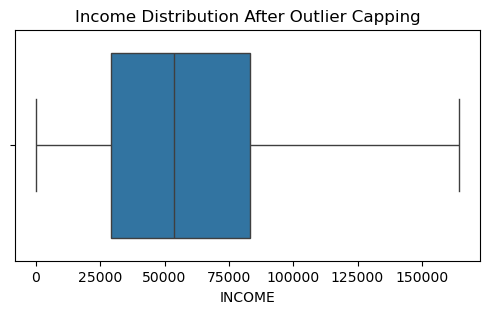

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
sns.boxplot(x=df['INCOME'])
plt.title("Income Distribution After Outlier Capping")
plt.show()


# ✅ Step 3.6 — Final Data Verification

After all data cleaning steps, we perform a final verification to ensure:
1. No missing values remain.
2. All columns have correct and consistent data types.
3. Numeric values are within valid ranges.
4. There are no obvious data entry issues left.

This gives us confidence that our dataset is **analysis-ready**.

We'll use:
- `df.info()` for datatype overview.
- `df.isnull().sum()` to check missing values.
- `df.describe()` to quickly verify numeric ranges.


In [32]:
# Step 3.6 — Final Data Verification

# 1️⃣ Check data types
print("📋 Data Types Summary:\n")
print(df.info())

print("\n" + "-"*80 + "\n")

# 2️⃣ Check for any remaining missing values
print("🔍 Missing Values Summary:\n")
missing_summary = df.isnull().sum()
print(missing_summary[missing_summary > 0] if (missing_summary > 0).any() else "✅ No missing values remain.")

print("\n" + "-"*80 + "\n")

# 3️⃣ Describe numeric columns to confirm range and consistency
print("📊 Numeric Summary:\n")
display(df.describe())

print("\n" + "-"*80 + "\n")

# 4️⃣ Quick sanity check on categorical columns
print("🧩 Sample Unique Values (Categoricals):")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()[:6]}")  # show only first 6 unique values


📋 Data Types Summary:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  object 
 3   AGE         10302 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         10302 non-null  float64
 6   INCOME      10302 non-null  float64
 7   PARENT1     10302 non-null  int64  
 8   HOME_VAL    10302 non-null  float64
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  10302 non-null  object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  float64
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  int64  
 19  OL

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
count,1.030200e+04,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000
mean,4.956631e+08,0.169288,44.837119,0.720443,10.502038,59843.214740,0.130363,154731.273539,33.416424,15607.894584,5.329159,0.288876,2525.199257,0.800718,0.122403,1.686129,1511.266453,8.309018,0.266550
std,2.864675e+08,0.506512,8.565132,1.116323,3.999896,42205.192762,0.336719,125006.189750,15.869687,8253.639210,4.110795,0.453262,3855.662006,1.154079,0.327767,2.081530,4725.249896,5.538136,0.442177
min,6.317500e+04,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.442869e+08,0.000000,39.000000,0.000000,9.000000,29164.750000,0.000000,0.000000,22.000000,9200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,4.970043e+08,0.000000,45.000000,0.000000,11.000000,53529.000000,0.000000,160661.000000,33.000000,14400.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,8.000000,0.000000
75%,7.394551e+08,0.000000,51.000000,1.000000,13.000000,83231.750000,0.000000,233085.000000,44.000000,20890.000000,7.000000,1.000000,4647.500000,2.000000,0.000000,3.000000,1144.750000,12.000000,1.000000
max,9.999264e+08,4.000000,69.000000,5.000000,23.000000,164332.250000,1.000000,582712.500000,142.000000,38425.000000,25.000000,1.000000,11618.750000,5.000000,1.000000,7.500000,123247.000000,25.500000,1.000000



--------------------------------------------------------------------------------

🧩 Sample Unique Values (Categoricals):
BIRTH: ['16MAR39' '21JAN56' '18NOV51' '05MAR64' '05JUN48' '17MAY49']
MSTATUS: ['no' 'yes']
GENDER: ['male' 'f']
EDUCATION: ['phd' 'high school' 'bachelors' '<high school' 'masters']
OCCUPATION: ['professional' 'blue collar' 'manager' 'clerical' 'doctor' 'lawyer']
CAR_USE: ['Private' 'Commercial']
CAR_TYPE: ['minivan' 'van' 'suv' 'sports car' 'panel truck' 'pickup']
URBANICITY: ['highly urban/ urban' 'highly rural/ rural']


### 🧠 What We Did:
- **Checked datatypes:** to confirm numeric columns (like income, age) are floats/ints, and categorical are objects.
- **Checked missing values:** confirmed all `NaN` are handled.
- **Used describe():** verified that numeric ranges (min, max) look realistic (no negative ages, no extreme income outliers).
- **Checked sample categories:** confirmed no duplicates like `'urban'` vs `'Urban'`.

### ✅ Outcome:
Our dataset is now:
- Clean
- Consistent
- Properly typed
- Ready for Exploratory Data Analysis (EDA)


In [34]:
# save cleaned dataframe to processed folder
df.to_csv('../data/processed/car_insurance_cleaned.csv', index=False)
print("Saved: ../data/processed/car_insurance_cleaned.csv")


Saved: ../data/processed/car_insurance_cleaned.csv
